In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (15,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

Use some matrix... just check if it trains and if so how quickly

In [4]:
from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R = movieLensAnalyzer.trainRatingMatrix

---

Our model.

Note we haven't fully cross validated yet, so the result is not be optimal.

In [5]:
from nnmf_vanilla import NNMF
model = NNMF(ratingMatrix=R)

---

Evaluation code. We'll look at the output for an arbituary user.

First, we look at the prior Rhats.

In [23]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r', alpha=0.4)
        axes[j].hist(rhats[:,j], histtype='stepfilled', normed=True)
    plt.xlim([0,6])
    f.suptitle(title)
    plt.show()

TEST_USERS = [11]
    
def score():
    # For now, just some mse of random users.
    mses = []
    for user_index in TEST_USERS:
        print('User', user_index)
        idx = np.where(R[user_index] > 0)
        samples = np.squeeze(model.sample_for_user(user_index, 50)[:,idx], axis=(1,))
        rhats = np.mean(samples, axis=0)
        r = R[user_index][idx]
        print("Rhats :", np.round(rhats[:30]))
        print("Actual:", r[:30])
        mses.append(np.mean(np.square(rhats - r)))
    print("MSE per user", mses)

%time score()

User 11
Rhats : [-7. -4. -2. -5. -4. -3. -6. -6. -4. -3. -4. -4. -5. -5. -6. -6. -4. -6.
 -5. -2. -5. -6. -5. -6. -3. -4. -4. -4. -6. -4.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.  5.  4.  5.  4.  5.  5.  4.  5.
  4.  4.  4.  5.  5.  4.  5.  1.  4.  3.  5.  4.]
MSE per user [78.884836665090347]
CPU times: user 4 ms, sys: 12 ms, total: 16 ms
Wall time: 10.9 ms


Train, and look at posterior Rhats, as well as the MSE for each of our chosen users.

In [24]:
mask = R>0

CPU times: user 17.3 s, sys: 396 ms, total: 17.7 s
Wall time: 6.76 s
User 11
Rhats : [ 4.  4.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  4.  4.  4.  4.
  5.  5.  5.  5.  5.  5.  5.  4.  5.  4.  4.  4.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.  5.  4.  5.  4.  5.  5.  4.  5.
  4.  4.  4.  5.  5.  4.  5.  1.  4.  3.  5.  4.]
MSE per user [0.58464068901148314]


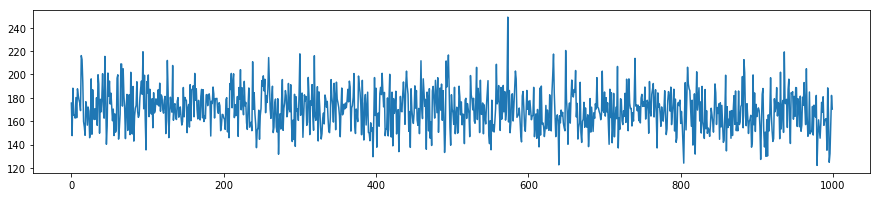

In [28]:
%time losses = model.train(legalTrainIndices=mask)
plt.plot(losses)
score()

---

Test save, load, reset.

In [29]:
model.save('bla.pkl') # We save as pickles. It would be better (for style) if you use the .pkl extension.

'bla.pkl'

In [30]:
model.reset()

In [31]:
score()

User 11
Rhats : [ 1.  2.  5.  4.  3.  4.  3.  1.  3.  3.  6.  3.  2.  1.  2.  5.  4.  4.
  6.  3.  6.  3.  7.  3.  3.  7.  3.  3.  7.  3.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.  5.  4.  5.  4.  5.  5.  4.  5.
  4.  4.  4.  5.  5.  4.  5.  1.  4.  3.  5.  4.]
MSE per user [4.2654889124652993]


In [32]:
model.load('bla.pkl')

In [33]:
score()

User 11
Rhats : [ 4.  4.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  4.  4.  4.  4.
  5.  5.  5.  5.  5.  5.  5.  4.  5.  4.  4.  4.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.  5.  4.  5.  4.  5.  5.  4.  5.
  4.  4.  4.  5.  5.  4.  5.  1.  4.  3.  5.  4.]
MSE per user [0.58464068901148314]
